# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1 
*Description of data*

In [37]:
import pandas as pd
df = pd.read_csv('university_enrollment_2306.csv')
df.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   object 
 5   post_score        1665 non-null   float64
 6   pre_requirement   1761 non-null   object 
 7   department        1850 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 115.8+ KB


# Data
1. The values in **"course_id"** are expected to be nominal as the unique identifiers of each course and there should be no missing values, as it is actual the case('int64'). So no need for action here.
2. The values in **"course_type"** are expected to be nominal (online, classroom) and thats the actual case('object') and since there are no missing values there is no need for action here.
3. The values in **"year"** are expected to be discrete ('int64') as found and we don't change it to 'datetime', as we are only interested in the year to represent it as dicrete year values. So no action here, since there are no missing values.
4. The values in **enrollment_count** are expected to be discrete as they actually are and since there are no missing values-no action here.
5. The values in **pre_score** are expected to be continuous in the type of 'float64', but we see that they are 'object'. So since there are no missing values, the only modification we will do is to convert it to 'float64'.
6. The values in **post_score** are expected to be continuous ('float64') and that's the case here. But we see that there are missing values (1850 - 1665 = 185) and we are instructed to replace them with zero.
7. The values in **pre_requirement** are expected to be nominal and that's the case here ('object'), but there are missing values (1850 - 1761 = 89) that need to be replaced by 'None'.
8. The values in **department** are expected to be nominal and that's the case here ('object') and since there no missing values, no further action needs to be taken.

In [39]:
# Change first to numeric because we couldn't parse it as it seems it had "-" in values,and then fill empty values with zero.
df['pre_score'] = pd.to_numeric(df['pre_score'], errors='coerce').fillna(0)

In [40]:
# Change the datatype of 'pre_score' to float.
df['pre_score'] = df['pre_score'].astype('float')
df['pre_score'].dtype

dtype('float64')

In [41]:
# Fill missing values with zero.
df['post_score'] = df['post_score'].fillna(0)

In [42]:
# Fill missing values with 'None'.
df['pre_requirement'] = df['pre_requirement'].fillna('None')

In [43]:
# Final check of our dataframe with the actions taken.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   float64
 5   post_score        1850 non-null   float64
 6   pre_requirement   1850 non-null   object 
 7   department        1850 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 115.8+ KB


In [44]:
df.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,None,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science


### All set to go!

## Task 2
*Description of Distribution*

We can use a histogram plot to visualize the frequency of the enrollment counts. This will provide insights into the distribution pattern and any potential outliers.

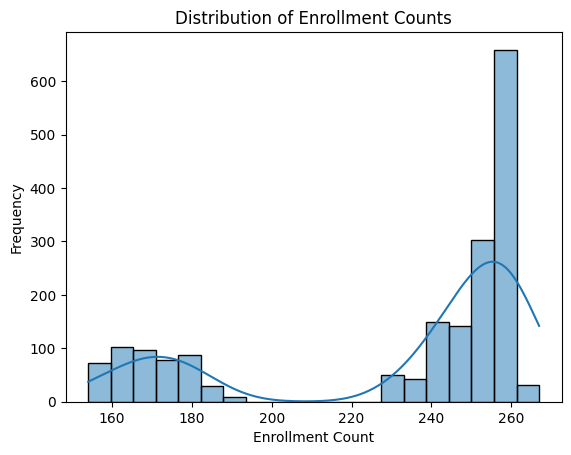

In [45]:
# Create histogram plot using seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(x='enrollment_count', data=df, kde=True, bins=20)
plt.title('Distribution of Enrollment Counts')
plt.xlabel('Enrollment Count')
plt.ylabel('Frequency')
plt.show()

From the plot above we can see that:
- The distribution appears to be left-skewed or negatively skewed, with the majority of the enrollment counts concentrated on higher values and the tail of the distribution extending towards lower counts of enrollment.
- The peak of the distribution, where the frequency is highest is observed around an enrollment count of approximately 260, with frequency around 650.
- There is a dip between approximately 195 and 225 enrollment counts where the frequency is zero. This indicates that in this range no courses have been offered.
- The range of enrollment counts starts a little after 150 and reaches up to approximately 270. This range covers the majority of the enrollment counts of this dataset.
- The frequency ranges from approximately 10 to 650. 
- As frequency reaches its max value (650) it abruptly decreases.

## Task 3
*Create a Visualization*

To visualize the number of courses for each type, we can create a barplot.

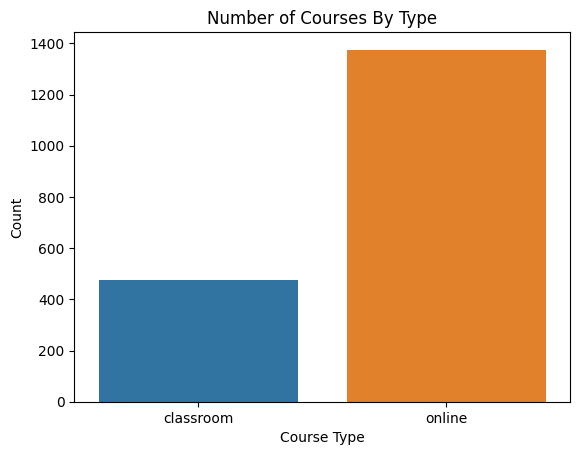

In [46]:
# Create countplot using seaborn
sns.countplot(x='course_type', data=df)
plt.title('Number of Courses By Type')
plt.xlabel('Course Type')
plt.ylabel('Count')
plt.show()

Based on the above plot we can observe:
- The course type with the most observations is of course 'online'. The bar of 'online' courses reaches up to about 1400 courses, in contrast to 'classroom' courses which reach up to approximately 500, indicating a much larger number of online courses compared to classic classroom courses.
- So there is signigicant imbalance in the observations of the two types, indicating an major emphasis on online courses and a potential skew towards them.

## Task 4
*Describe The Relationship*

To describe the relationship between course type and enrollment count we can use a boxplot to visualize the distribution of enrollment counts by course type. This way we can compare the central tendency, spread, and potential outliers in the enrollment counts across all course types.

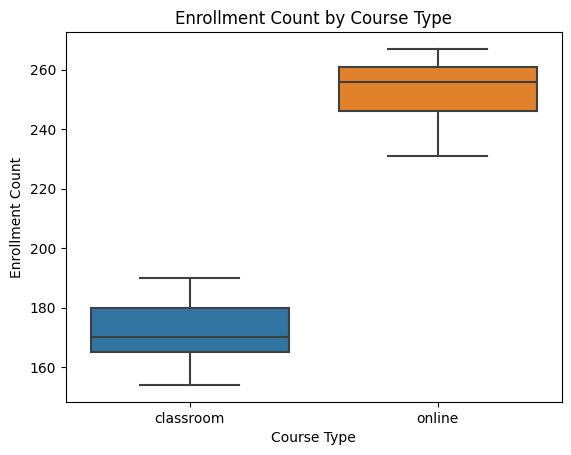

In [47]:
# Create boxplot using seaborn
sns.boxplot(data=df, x='course_type', y='enrollment_count')
plt.title('Enrollment Count by Course Type')
plt.xlabel('Course Type')
plt.ylabel('Enrollment Count')
plt.show()

From the plot above we can observe:

For the **Classroom** course type:
- The lower part of the box (the 25th percentile) of enrollment counts is around 165.
- The upper part of the box (the 75th percentile) of enrollment counts is around 180.
- The median line (the 50th percentile) of the enrollment counts is positioned below the halfway mark of the box at around 170. This shows that data is not evenly distributed and that the lower half dataset of this column is more spread than the upper part.
- The minimum enrollment count is around 80 while the maximum is around 190.
- There are no outliers observed outside the whiskers.

For the **Online** course type:
- The lower part of the box (the 25th percentile) of enrollment counts is around 245.
- The upper part of the box (the 75th percentile) of enrollment counts is around 260.
- The median line (the 50th percentile) of the enrollment counts is positioned above the halfway mark of the box at around 255. This shows that data is not evenly distributed and that the lower half dataset of this column is less spread than the upper part.
- The minimum enrollment count is around 230 while the maximum is around 270.
- There are no outliers observed outside the whiskers.

Generally, we can say that 'classroom' courses have lower enrollment counts with respect to 'online' courses.

## Task 5
*Predict The Students*

The answer to how many students will enroll to a course is a regression problem. Regression in machine learning is a type where the goal is to predict a continuous numerical value based on input variables. In our case the **input variables** will be **course_type**, **department**, **pre_requirement** etc and the **target variable** to be predicted is the number of student **enrollment_count**, which is a continuous numerical value. By using regression techniques we can build a model that takes into account the relevant features, learns the underlying patterns and relationships and makes predictions on new unseen data.

## Task 6
*Fit Baseline Model*

We can start with a simple linear regression model as a baseline. I exclude 'user_id' as it will not bring any additional information as it is a unique identifier of each course and may cause noise.

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Select relevant features excluding 'user_id'
X = df[['course_type', 'year', 'pre_score', 'post_score', 'pre_requirement', 'department']]
y = df['enrollment_count']

# One-Hot-Encoding for categorical variables
X = pd.get_dummies(X)

# Split data in training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model and fit the model
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Make predictions
y_pred1 = model1.predict(X_test)

## Task 7
*Fit Comparison Model*

Our comparison model will use a more advanced algorithm such as a Random Forest Regression.

In [49]:
from sklearn.ensemble import RandomForestRegressor

# Select relevant features excluding 'user_id'
X = df[['course_type', 'year', 'pre_score', 'post_score', 'pre_requirement', 'department']]
y = df['enrollment_count']

# One-Hot-Encoding for categorical variables
X = pd.get_dummies(X)

# Split data in training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model and fit the model
model2 = RandomForestRegressor(random_state=42)
model2.fit(X_train, y_train)

# Make predictions
y_pred2 = model2.predict(X_test)

## Task 8
*Explain Why*

**Linear Regression Model**
- It is a simple and widely used model for regression problems.
- It is a good starting point for modeling as it can be used for comparison with more advanced algorithms.
- It is computationally efficient and interpretable.
- It can handle both numerical and categorical features.
- It gives straightforward the importance of different features.
- It captures linear combination of the features.

**Random Forest Regression Model**
- It is an ensemble method that combines multiple decision trees to make predictions.
- It is a powerfull algorithm that captures non-linear relationships, interactions between features and handles complex datasets.
- It can handle both numerical and categorical features.
- It provides an estimate of feature importance, identifying the most influential features.
- It can handle outliers and missing data, less preprocessing.

By comparing both models we can get insights into their performance and check if a more complex model as Random Forest can give better predictions than the simple Linear Regression.

## Task 9
*Performance Comparison*

To compare the performance of the two models we can use evaluation metrics such as MSE-mean squared error and R^2 score. 
- MSE measures the average squared difference between the predicted and the actual enrollment counts. **Lower MSE** indicates better performance.
- R^2 score represents the proportion of variance in the target variable that can be explained by the model. It ranges between 0 and 1, with 1 indicating better fit. A **higher R^2** indicates better performance.

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate mean squared error for both models
linear_mse = mean_squared_error(y_test, y_pred1)
rf_mse = mean_squared_error(y_test, y_pred2)

# Calculate R-squared score for both models
linear_r2 = r2_score(y_test, y_pred1)
rf_r2 = r2_score(y_test, y_pred2)

# Print the results
print('Linear Regression')
print('Mean Squared Error:', linear_mse)
print('R-squared Score:', linear_r2)
print('Random Forest Regression')
print('Mean Squared Error:', rf_mse)
print('R-squared Score:', rf_r2)

Linear Regression
Mean Squared Error: 0.09918317291355995
R-squared Score: 0.9999215450110968
Random Forest Regression
Mean Squared Error: 0.12068171921921964
R-squared Score: 0.9999045394227263


## Task 10
*Which model?*

Based on the results, we can observe the following:

- Both models have very low MSE values indicating that they have achieved a high level of accuracy in predicting the enrollment_counts.
- The Linear Regression model achieves a slightly lower MSE than Random Forest Regression Model suggesting it has slightly better performance in terms of reducing the difference of predicted and actual values of enrollment_counts.
- Both models have very high R^2 score, close to 1, indicating that they both explain a significant amount of the variance of in the enrollment_counts. This also suggests that they fit data well and can capture the underlying patterns between the input variables and the target variable.

Although the difference is relatively small and both models achieved very good accuracy, Linear Regression shows slightly better performance.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam